In [1]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv("../Dataset/car_sales_data.csv")

In [3]:
print("First five rows of dataset: \n")
df.head()

First five rows of dataset: 



,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [4]:
print("Data informations: \n")
df.info()

Data informations: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [5]:
print("Data descriptions: \n")
df.describe()

Data descriptions: 



,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


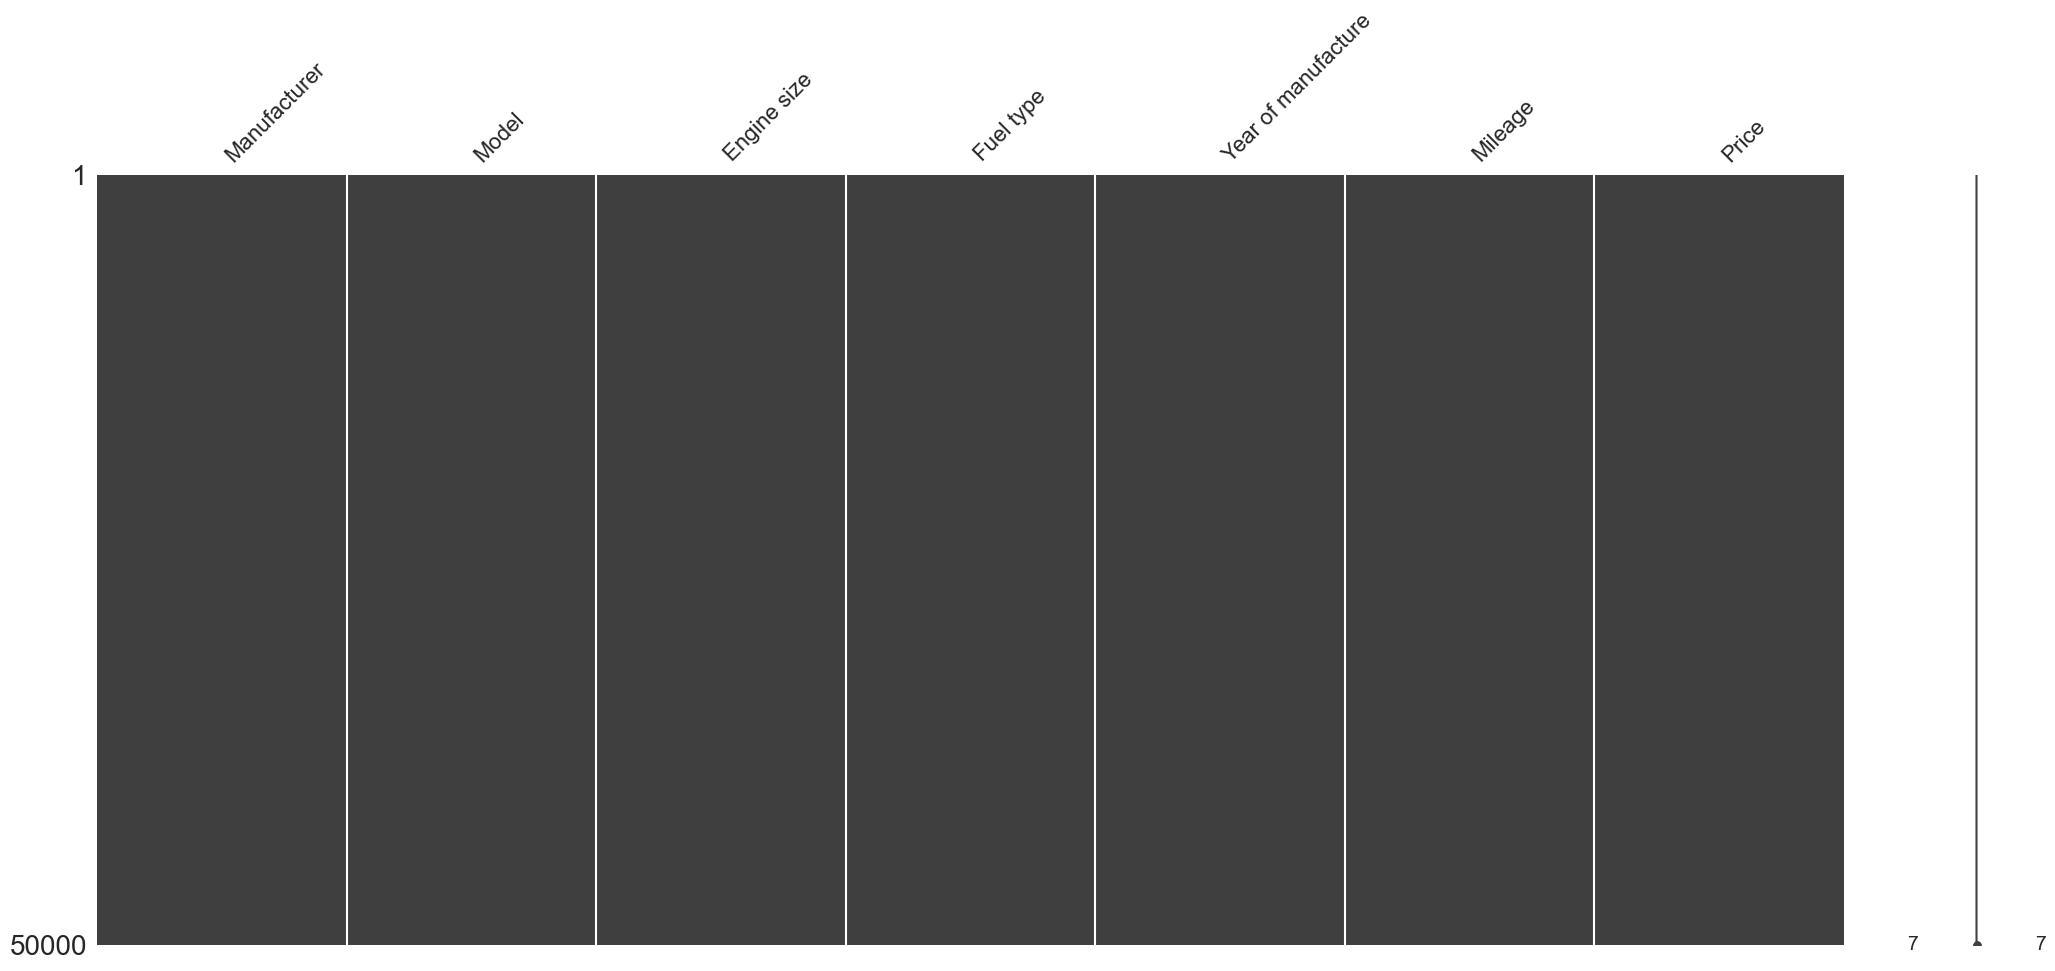

In [6]:
msno.matrix(df)
plt.show()

In [7]:
df_encoded = pd.get_dummies(df, columns=["Fuel type", "Manufacturer", "Model"], drop_first=True)

X = df_encoded.drop(columns=["Price"])
y = df_encoded["Price"]

X[["Year of manufacture"]] = 2025 - X[["Year of manufacture"]]
X = X.rename(columns={'Year of manufacture': 'Age of car'})

X[["Engine size", "Mileage", "Age of car"]] = (
            (X[["Engine size", "Mileage", "Age of car"]] - X[["Engine size", "Mileage", "Age of car"]].mean()) /
            X[["Engine size", "Mileage", "Age of car"]].std())
# y = (y - y.mean()) / y.std()
y = np.log(y)

In [8]:
transformer = SymbolicTransformer()
transformer.fit(X, y)

SymbolicTransformer()

In [9]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-1.053058,0.229053,0.206647,False,True,True,False,False,False,False,...,-5.848919,-2.924459,-2.924459,-2.924459,-2.924459,-2.924459,-2.924459,-2.924459,-2.924459,-2.924459
1,3.033535,-1.222331,-0.762884,False,True,False,True,False,False,False,...,14.007931,7.003965,7.003965,7.003965,7.003965,7.003965,7.003965,7.003965,7.003965,7.003965
2,-0.235739,-1.01499,-1.023381,False,False,True,False,False,False,False,...,7.682005,3.841002,3.841002,3.841002,3.841002,3.841002,3.841002,3.841002,3.841002,3.841002
3,0.0367,1.680437,1.372515,True,False,False,False,True,False,False,...,-11.138408,-5.069204,-5.069204,-5.069204,-5.069204,-5.069204,-5.069204,-5.069204,-5.069204,-5.069204
4,-1.053058,-0.185628,0.214591,False,True,False,False,False,True,False,...,-4.221967,-2.110984,-2.110984,-2.110984,-2.110984,-2.110984,-2.110984,-2.110984,-2.110984,-2.110984


In [10]:
y.head()

0     8.030735
1    10.813841
2    10.088805
3     7.441320
4     8.318986
Name: Price, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
est_gp = SymbolicRegressor()
est_gp.fit(X_train, y_train)

SymbolicRegressor()

In [13]:
print("R2 Score of test samples whit the model: ", r2_score(y_test, est_gp.predict(X_test)))

R2 Score of test samples whit the model:  0.9701186957414658
